In [1]:
import pandas as pd
import numpy as np

In [2]:
data_liga = pd.read_csv('Datos/2018-2019.1eraDivision(FT,HTresults;matchstats;match,totalgoals,AHodds).csv')
features = ['Date', 'HomeTeam', 'AwayTeam',
            'BbAvH', 'BbAvD', 'BbAvA',
            'B365H', 'B365D', 'B365A',
            'FTHG', 'FTAG', 'FTR']
data = data_liga[features]

def expected_returns(data, h, d, a, ncol, name_column):
    new_col = data.apply(lambda x: 1/x[h] + 1/x[d] + 1/x[a], axis=1)
    data.insert(loc=ncol, column=name_column, value=new_col)
expected_returns(data, 'BbAvH', 'BbAvD', 'BbAvA', 6, 'BbAvHRet')

def predictions(data, h, d, a, rets, ncol):
    ph = data.apply(lambda x: 1/x[h]/x[rets], axis=1)
    pd = data.apply(lambda x: 1/x[d]/x[rets], axis=1)
    pa = data.apply(lambda x: 1/x[a]/x[rets], axis=1)
    data.insert(loc=ncol, column='ph', value=ph)
    data.insert(loc=ncol+1, column='pd', value=pd)
    data.insert(loc=ncol+2, column='pa', value=pa)
predictions(data, 'BbAvH', 'BbAvD', 'BbAvA', 'BbAvHRet', 7)
data = data.drop(['BbAvH', 'BbAvD', 'BbAvA', 'BbAvHRet'], axis=1)

new_col = data.apply(lambda x: x['Date'].split('/')[1], axis=1)
data.insert(loc=1, column='Month', value=new_col)

In [3]:
data_fifa = pd.read_csv('Datos/Features_FIFA_score/fifaindex_1819.csv')

def transform_month(data):
    # ADD 1 MONTH BECOUSE DATA IS TAKEN AT THE FINAL OF THE MONTH
    # THUS FOR ANALYSIS IN THE MATCHES OF OCTOBER I USE DATA OF SEPTEMBER
    # IN AUGUST WE DO NOT HAVE DATA OF JULY SO I WILL REPEATE AND USE THE DATA OF FINALS OF MONTH
    data.loc[data['Date'] == 8, 'Date'] = '09'
    data.loc[data['Date'] == 9, 'Date'] = '10'
    data.loc[data['Date'] == 10, 'Date'] = '11'
    data.loc[data['Date'] == 11, 'Date'] = '12'
    data.loc[data['Date'] == 12, 'Date'] = '01'
    data.loc[data['Date'] == 1, 'Date'] = '02'
    data.loc[data['Date'] == 2, 'Date'] = '03'
    data.loc[data['Date'] == 3, 'Date'] = '04'
    data.loc[data['Date'] == 4, 'Date'] = '05'
    data.loc[data['Date'] == 5, 'Date'] = '06'

def transform_team(data):
    data.loc[data['Team'] == 'FC Barcelona', 'Team'] = 'Barcelona'
    data.loc[data['Team'] == 'Atlético Madrid', 'Team'] = 'Ath Madrid'
    data.loc[data['Team'] == 'Valencia CF', 'Team'] = 'Valencia'
    data.loc[data['Team'] == 'Villarreal CF', 'Team'] = 'Villarreal'
    data.loc[data['Team'] == 'Real Betis', 'Team'] = 'Betis'
    data.loc[data['Team'] == 'Athletic Club', 'Team'] = 'Ath Bilbao'
    data.loc[data['Team'] == 'Sevilla FC', 'Team'] = 'Sevilla'
    data.loc[data['Team'] == 'SD Eibar', 'Team'] = 'Eibar'
    data.loc[data['Team'] == 'RC Celta', 'Team'] = 'Celta'
    data.loc[data['Team'] == 'Real Sociedad', 'Team'] = 'Sociedad'
    data.loc[data['Team'] == 'Getafe CF', 'Team'] = 'Getafe'
    data.loc[data['Team'] == 'RCD Espanyol', 'Team'] = 'Espanol'
    data.loc[data['Team'] == 'Girona FC', 'Team'] = 'Girona'
    data.loc[data['Team'] == 'Levante UD', 'Team'] = 'Levante'
    data.loc[data['Team'] == 'D. Alavés', 'Team'] = 'Alaves'
    data.loc[data['Team'] == 'CD Leganés', 'Team'] = 'Leganes'
    data.loc[data['Team'] == 'SD Huesca', 'Team'] = 'Huesca'
    data.loc[data['Team'] == 'Rayo Vallecano', 'Team'] = 'Vallecano'
    data.loc[data['Team'] == 'R. Valladolid CF', 'Team'] = 'Valladolid'

transform_month(data_fifa)
transform_team(data_fifa)

In [20]:
print(sorted(data_fifa['Team'].unique()))

['Alaves', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 'Celta', 'Eibar', 'Espanol', 'Getafe', 'Girona', 'Huesca', 'Leganes', 'Levante', 'Real Madrid', 'Sevilla', 'Sociedad', 'Valencia', 'Valladolid', 'Vallecano', 'Villarreal']


In [21]:
print(sorted(data_fifa['Team'].unique()))

['Alaves', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 'Celta', 'Eibar', 'Espanol', 'Getafe', 'Girona', 'Huesca', 'Leganes', 'Levante', 'Real Madrid', 'Sevilla', 'Sociedad', 'Valencia', 'Valladolid', 'Vallecano', 'Villarreal']


In [4]:
def add_team_score(data, data_scores):
    ATTH, MIDH, DEFH, ATTA, MIDA, DEFA = [], [], [], [], [], []
    for h, a, m in data[['HomeTeam', 'AwayTeam', 'Month']].values:
        if m == '08': # DATA BEGINS MID AUGUST, TAKE AUGUST IN MATCHES OF AUGUST AS WELL AS SEPTEMBER
            m = '09'
        ATTH.append(data_scores['ATT'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        MIDH.append(data_scores['MID'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        DEFH.append(data_scores['DEF'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        ATTA.append(data_scores['ATT'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
        MIDA.append(data_scores['MID'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
        DEFA.append(data_scores['DEF'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
    data.insert(loc=4, column='ATTH', value=ATTH)
    data.insert(loc=5, column='MIDH', value=MIDH)
    data.insert(loc=6, column='DEFH', value=DEFH)
    data.insert(loc=7, column='ATTA', value=ATTA)
    data.insert(loc=8, column='MIDA', value=MIDA)
    data.insert(loc=9, column='DEFA', value=DEFA)
add_team_score(data, data_fifa)

In [5]:
def get_data(data):
    X = data.values[:, 4:13]
    out = data.values[:, -1]
    y_full = np.zeros((X.shape[0], 7))
    for i, y_i in enumerate(out):
        if y_i == 'H':
            y_full[i, 0] = 1.0
        if y_i == 'A':
            y_full[i, 1] = 1.0
        if y_i == 'D':
            y_full[i, 2] = 1.0
        
        y_full[i, 4] = data.values[i, 13] # ODDS OF HOME TEAM in the house you want to bet in
        y_full[i, 5] = data.values[i, 14]
        y_full[i, 6] = data.values[i, 15] # ODDS OF AWAY TEAM blabla
    
    return X, y_full, out
X, y, outcome = get_data(data)

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y, = train_test_split(X,  y) # SPLIT THE DATA IN TRAIN AND TEST DATASET.

In [6]:
def odds_loss(y_true, y_pred):
    win_home = y_true[:, 0:1]
    win_away = y_true[:, 1:2]
    draw = y_true[:, 2:3]
    no_bet = y_true[:, 3:4]
    
    odds_h = y_true[:, 4:5]
    odds_d = y_true[:, 5:6]
    odds_a = y_true[:, 6:7]
    
    gain_loss_vector = K.concatenate([win_home * (odds_h - 1) - (1 - win_home),
                                      win_away * (odds_a - 1) - (1 - win_away),
                                      draw * (odds_d - 1) - (1 - draw),
                                      K.zeros_like(odds_d)], axis=1)

    return -K.mean(K.sum(gain_loss_vector * y_pred, axis=1))

In [8]:
from keras.layers import BatchNormalization, Dense, Input, Dropout
from keras.models import Model
from keras import backend as K

def get_model(input_dim, output_dim, base=2000, multiplier=0.95, p=0.4):
    inputs = Input(shape=(input_dim,))
    l = BatchNormalization()(inputs)
    l = Dropout(p)(l)
    n = base
    l = Dense(n, activation='relu')(l)
    l = BatchNormalization()(l)
    l = Dropout(p)(l)
    n = int(n * multiplier)
    l = Dense(n, activation='relu')(l)
    l = BatchNormalization()(l)
    l = Dropout(p)(l)
    n = int(n * multiplier)
    l = Dense(n, activation='relu')(l)
    outputs = Dense(output_dim, activation='softmax')(l)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='Nadam', loss=odds_loss)
    return model

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = get_model(9, 4)
history = model.fit(train_x, train_y, 
                    validation_data = (test_x, test_y),
                    epochs = 50, 
                    batch_size = 10, 
                    callbacks = [EarlyStopping(patience=10),
                                 ModelCheckpoint('odds_loss.hdf5',
                                                 save_best_only=True)]
                   )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 285 samples, validate on 95 samples
Epoch 1/50
285/285 [==============================] - 7s 23ms/step - loss: 0.0275 - val_loss: -0.1270
Epoch 2/50
285/285 [==============================] - 5s 18ms/step - loss: -0.0648 - val_loss: -0.1423
Epoch 3/50
285/285 [==============================] - 5s 17ms/step - loss: -0.0416 - val_loss: 3.4556e-04
Epoch 4/50
285/285 [==============================] - 5s 17ms/step - loss: 0.0299 - val_loss: -0.1134
Epoch 5/50
285/285 [==============================] - 5s 18ms/step - loss: -0.0214 - val_loss: 5.0317e-10
Epoch 6/50
285/285 [==============================] - 5s 17ms/step - loss: 0.0268 - val_loss: -0.1049
Epoch 7/50
285/285 [==============================] - 5s 18ms/step - loss: 0.0170 - val_loss: -0.1160
Epoch 8/50
285/285 [==============================] - 5s 18ms/step - loss: 0.0894 - val_loss: -0.0817
Epoch 9/50

In [10]:
all_x = data.values[:, 4:13]
preds = model.predict(all_x)
predictions = []
for i in preds:
    if np.argmax(i) == 0:
        predictions.append('H')
    elif np.argmax(i) == 1:
        predictions.append('A')
    elif np.argmax(i) == 2:
        predictions.append('D')
    elif np.argmax(i) == 3:
        predictions.append('NO')
        
data['Preds'] = predictions
data.head()

No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
N

,Date,Month,HomeTeam,AwayTeam,ATTH,MIDH,DEFH,ATTA,MIDA,DEFA,ph,pd,pa,B365H,B365D,B365A,FTHG,FTAG,FTR,Preds
0,17/08/2018,08,Betis,Levante,79,80,80,78,76,75,0.568378,0.238719,0.192904,1.66,4.0,5.0,0,3,A,NO
1,17/08/2018,08,Girona,Valladolid,80,78,75,73,72,71,0.535891,0.264968,0.199141,1.75,3.6,5.0,0,0,D,D
2,18/08/2018,08,Barcelona,Alaves,89,84,85,76,76,74,0.865900,0.096995,0.037105,1.11,10.0,21.0,3,0,H,D
3,18/08/2018,08,Celta,Espanol,79,77,76,76,77,75,0.502355,0.270389,0.227256,1.85,3.5,4.5,1,1,D,NO
4,18/08/2018,08,Villarreal,Sociedad,81,80,79,79,77,75,0.469102,0.277632,0.253265,2.04,3.4,3.8,1,2,A,NO


In [11]:
def accuracy_predictions(data, predict, house_bet_h, house_bet_a, house_bet_d):
    i = 0
    gain_journey = []
    for j in range(38):
        print('- Jornada nº{}/{}'.format(j+1,38))
        betted = 0
        accuracy = 0
        profits = 0
        for k in range(10):
            if data[predict][i] == 'H':
                betted += 1
                if data['FTR'][i] == 'H':
                    accuracy += 1
                    profits += (data[house_bet_h][i])
            if data[predict][i] == 'A':
                betted += 1
                if data['FTR'][i] == 'A':
                    accuracy += 1
                    profits += (data[house_bet_a][i])
            if data[predict][i] == 'D':
                betted += 1
                if data['FTR'][i] == 'D':
                    accuracy += 1
                    profits += (data[house_bet_d][i])
            i+=1
        print('    Accuracy = {}/{}'.format(accuracy, betted))
        print('    Profits = {}€'.format(profits))
        print('    Win (or lost) = {}€\n'.format(profits-betted))
        gain_journey.append(profits-betted)
    return gain_journey
        
gain_journey = accuracy_predictions(data, 'Preds', 'B365H', 'B365A', 'B365D')

- Jornada nº1/38
    Accuracy = 1/2
    Profits = 3.6€
    Win (or lost) = 1.6€

- Jornada nº2/38
    Accuracy = 0/1
    Profits = 0€
    Win (or lost) = -1€

- Jornada nº3/38
    Accuracy = 1/3
    Profits = 3.2€
    Win (or lost) = 0.20000000000000018€

- Jornada nº4/38
    Accuracy = 0/0
    Profits = 0€
    Win (or lost) = 0€

- Jornada nº5/38
    Accuracy = 1/2
    Profits = 3.5€
    Win (or lost) = 1.5€

- Jornada nº6/38
    Accuracy = 1/1
    Profits = 4.0€
    Win (or lost) = 3.0€

- Jornada nº7/38
    Accuracy = 0/1
    Profits = 0€
    Win (or lost) = -1€

- Jornada nº8/38
    Accuracy = 0/1
    Profits = 0€
    Win (or lost) = -1€

- Jornada nº9/38
    Accuracy = 1/1
    Profits = 4.0€
    Win (or lost) = 3.0€

- Jornada nº10/38
    Accuracy = 0/1
    Profits = 0€
    Win (or lost) = -1€

- Jornada nº11/38
    Accuracy = 0/1
    Profits = 0€
    Win (or lost) = -1€

- Jornada nº12/38
    Accuracy = 0/0
    Profits = 0€
    Win (or lost) = 0€

- Jornada nº13/38
    Accuracy =

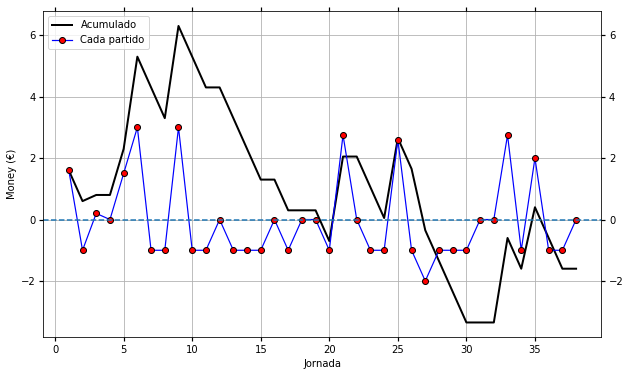

In [22]:
import matplotlib.pyplot as plt
gain_journey = np.array(gain_journey)
fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(which='both',direction='out', length=4, width = 1.2,
        labelbottom=True,labeltop=False,labelleft=True,
        labelright=True,bottom=True,top=True,left=True,right=True)

ax.plot(range(1,39), [np.sum(gain_journey[:i]) for i in range(1,39)], color='k', lw=2, label='Acumulado')
ax.plot(range(1,39), gain_journey, marker='o', color='blue', mec='k', mfc='r', linewidth=1.2, label='Cada partido')
ax.axhline(y=0, ls='--')
ax.set_xlabel('Jornada')
ax.set_ylabel('Money (€)')
ax.legend(loc=2)
plt.grid(True)

fig.savefig('VirtualGain1819.png', bbox_inches='tight')

In [14]:
from keras.models import load_model

model.save('model_bets_hoy.h5')  # creates a HDF5 file